In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [17]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

In [18]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [19]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data_oae = xr.open_dataset(dataset)

In [20]:
sliced_data_baseline = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

In [21]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)

In [30]:
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [23]:
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

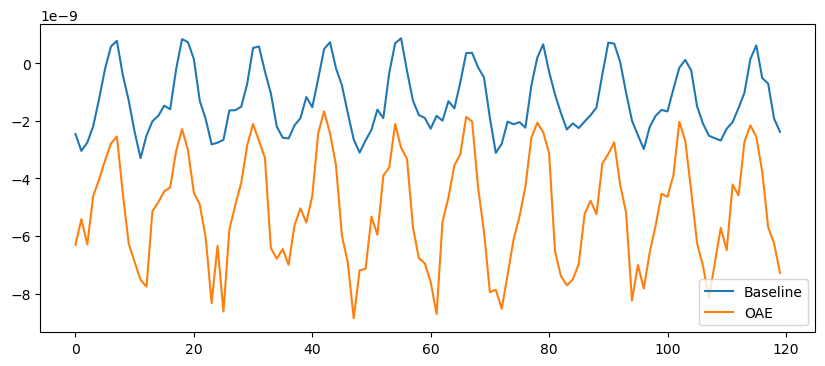

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x')), label = 'OAE')
plt.legend()
plt.show()

In [34]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_baseline = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [35]:
co2flux_season_summary_baseline = co2_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)

In [36]:
co2flux_season_mean_all_years_baseline = co2_flux_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [37]:
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [38]:
# slice timeframe

start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_oae = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [40]:
co2flux_season_summary_oae = co2_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)

In [42]:
co2flux_season_mean_all_years_oae = co2_flux_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [43]:
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

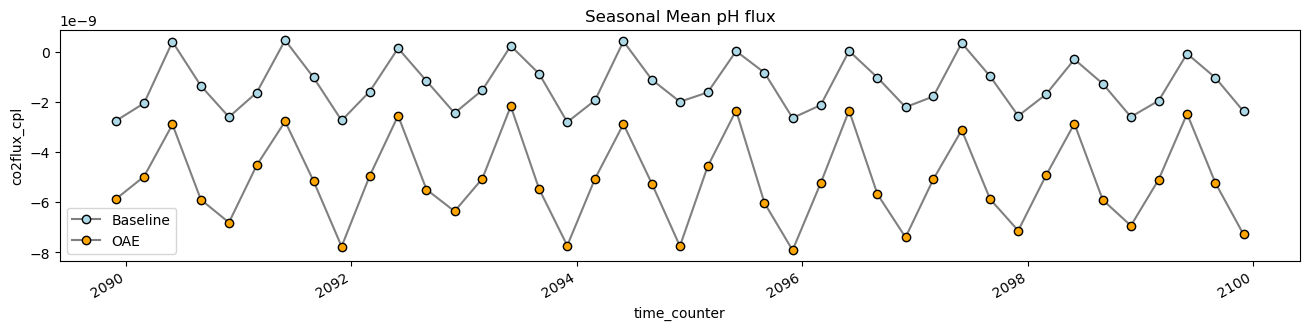

In [44]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_seasonal_mean_baseline.plot(marker="o",
                        color="grey",
                        markerfacecolor="lightblue",
                        markeredgecolor="black", 
                        label = 'Baseline')
ax.set(title="Seasonal Mean pH flux")

co2flux_seasonal_mean_oae.plot(marker="o",
                        color="grey",
                        markerfacecolor="orange",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set(title="Seasonal Mean pH flux")

plt.legend()
plt.show()